In [30]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap


In [42]:
full = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Daily_Data_CNN/full_data.nc')
full

<xarray.Dataset>
Dimensions:    (time: 14610, lon: 144, lat: 90, n_channel: 19, categories: 20)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2019-12-31
  * n_channel  (n_channel) object 'H500_lead0' 'H500_lead1' ... 'IWV_lead2'
Dimensions without coordinates: lon, lat, categories
Data variables:
    features   (time, lon, lat, n_channel) float32 dask.array<chunksize=(14610, 144, 90, 19), meta=np.ndarray>
    labels_1d  (time, categories) int64 dask.array<chunksize=(14610, 20), meta=np.ndarray>

In [31]:
val = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Daily_Data_CNN/validate.nc')
val

<xarray.Dataset>
Dimensions:    (time: 2191, lon: 144, lat: 90, n_channel: 19, categories: 20)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-02 1980-01-03 ... 2019-12-21
  * n_channel  (n_channel) object 'H500_lead0' 'H500_lead1' ... 'IWV_lead2'
Dimensions without coordinates: lon, lat, categories
Data variables:
    features   (time, lon, lat, n_channel) float32 dask.array<chunksize=(2191, 144, 90, 19), meta=np.ndarray>
    labels_1d  (time, categories) int64 dask.array<chunksize=(2191, 20), meta=np.ndarray>

In [33]:
train = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Daily_Data_CNN/train_trim.nc')
train

<xarray.Dataset>
Dimensions:    (time: 2240, lon: 144, lat: 90, n_channel: 19, categories: 20)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-08 1980-01-09 ... 2019-12-31
  * n_channel  (n_channel) object 'H500_lead0' 'H500_lead1' ... 'IWV_lead2'
Dimensions without coordinates: lon, lat, categories
Data variables:
    features   (time, lon, lat, n_channel) float32 dask.array<chunksize=(2240, 144, 90, 19), meta=np.ndarray>
    labels_1d  (time, categories) int64 dask.array<chunksize=(2240, 20), meta=np.ndarray>

In [38]:
np.sum(train.labels_1d.values,0)

array([448, 424, 418, 468, 388, 335, 396, 374, 366, 335, 489, 471, 460,
       502, 482, 507, 510, 472, 415, 382])

In [41]:
np.sum(np.where(np.sum(train.labels_1d.values,1)>0,0,1))

488

In [7]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os


# X data
fp = '/rc_scratch/reba1583/variable_yr_files4/'
variables = [
    'H','H','H',
    
    'U',
    
    'V',
    
    'SLP','SLP','SLP',
    
    'EFLUX','EFLUX','EFLUX',
    
    'LWTNET','LWTNET','LWTNET',
    
    'sf', 'sf',
    
    'IWV','IWV','IWV',
    
#     'AODANA', 'AODANA', 'AODANA'  
]
variable_names = [
    'H500_lead0', 'H500_lead1', 'H500_lead2',
    
    'U800_lead0',
    
    'V800_lead0',
    
    'SLP_lead0', 'SLP_lead1', 'SLP_lead2',
    
    'EFLUX_lead0', 'EFLUX_lead1', 'EFLUX_lead2',
    
    'LWTNET_lead3', 'LWTNET_lead4', 'LWTNET_lead5',
    
    'sf_lead0','sf_lead4',
    
    'IWV_lead0', 'IWV_lead1', 'IWV_lead2',

#     'AODANA_lead0', 'AODANA_lead1', 'AODANA_lead2'
]



In [28]:
data_list = []
for v in range(len(variable_names)):
    data = xr.open_mfdataset(fp+variable_names[v]).isel(time = slice(0,100))[variables[v]].transpose('time', 'lon','lat_index').values
    data_list.append(data)
data = np.stack([data_list], axis = 3).squeeze()
data = np.rollaxis(data, 0, start=4)
# data = np.swapaxes(np.swapaxes(np.swapaxes(data,0,1),1,2), 2,3).squeeze() # sqitch coordinates to order time, lon, lat, n_channel 



# # Y data
# Y = pd.read_csv('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AR_binary_daily.csv', index_col = False)
# Y = np.array(Y).T


# # times for final xarray
# variable_times = pd.to_datetime(np.array(xr.open_mfdataset(fp+'U800_lead0').time))

# var_data = dict(
#     features = ([ 'time', 'lon', 'lat','n_channel' ], data),
#     labels_1d = (['time','categories'], Y)
# )

# coords = dict(
#     time = (['time'], variable_times), 
#     n_channel = (['n_channel'], np.array(variable_names)),
      
# )

# ds = xr.Dataset(
#     data_vars = var_data, 
#     coords = coords
# )

# ds = ds.fillna(0)

In [29]:
np.shape(data)

(100, 144, 90, 19)

In [27]:
np.shape(np.rollaxis(data, 0, start=4))

(100, 144, 90, 19)

In [2]:
data_list = []
for v in range(len(variable_names)):
    data = xr.open_mfdataset(fp+variable_names[v])[variables[v]].transpose('time', 'lon','lat_index').values
    data_list.append(data)

    


In [13]:
xr.open_mfdataset(fp+'U800_lead0')

<xarray.Dataset>
Dimensions:    (time: 14610, lat_index: 90, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2019-12-31
  * lon        (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    lat        (lat_index) float64 dask.array<chunksize=(90,), meta=np.ndarray>
  * lat_index  (lat_index) int64 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
Data variables:
    U          (time, lat_index, lon) float32 dask.array<chunksize=(14610, 90, 144), meta=np.ndarray>

In [4]:
data = np.stack(data_list )

In [7]:
# Y data
Y = pd.read_csv('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AR_binary_daily.csv', index_col = False)
Y = np.array(Y).T


In [2]:
data = np.swapaxes(np.swapaxes(np.swapaxes(data,0,1),1,2), 2,3)

NameError: name 'np' is not defined

In [5]:
test = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Daily_Data_CNN/')
test

/home/reba1583/.local/lib/python3.7/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/reba1583/.local/lib/python3.7/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/reba1583/.local/lib/python3.7/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/reba1583/.local/lib/python3.7/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/reba1583/.local/lib/python3.7/site-packages/xarray/backends/plugins.py:126: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [ ]:
# times for final xarray
variable_times = pd.to_datetime(np.array(xr.open_mfdataset(fp+'U800_lead0').time))

var_data = dict(
    features = ([ 'time', 'lon', 'lat','n_channel' ], data),
    labels_1d = (['time','categories'], Y)
)

coords = dict(
    time = (['time'], variable_times), 
    n_channel = (['n_channel'], np.array(variable_names)),
      
)

ds = xr.Dataset(
    data_vars = var_data, 
    coords = coords
)

ds = ds.fillna(0)


In [1]:
ds

NameError: name 'ds' is not defined

In [3]:
for i in range(len(data_list)):
    print(np.shape(data_list[i]))

(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)
(14610, 144, 90)


In [19]:
np.shape(data)

(1, 19)

In [45]:
year = 1980
fp = '/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/'
test = xr.open_mfdataset(fp+'200streamfunc/sf_'+str(year)+'*')
year_data = test.reindex(lat=list(reversed(test.lat)))

/home/reba1583/.local/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [46]:
year_data

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 2928)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-12-31T21:00:00
Data variables:
    sf       (time, lat, lon) float32 dask.array<chunksize=(248, 361, 576), meta=np.ndarray>

In [133]:
year = 1980
fp = '/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/'
test = xr.open_mfdataset(fp+'200streamfunc/sf_'+str(year)+'*')
year_data = test.reindex(lat=list(reversed(test.lat)))

year_data = year_data.shift(time = int(96/3), fill_value = np.nan)
year_data = year_data.load()
year_data.sf[0:32] = np.array([year_data.sf[32].values]*32)
year_data = year_data.resample(time = '24H').mean()

/home/reba1583/.local/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [137]:
year_data = year_data.resample(time = '24H').mean()

In [148]:
roller = year_data.rolling(time=4, center = 0, min_periods = 1)
data = roller.mean()


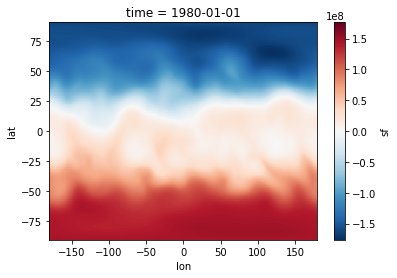

In [166]:
data.isel(time = 0).sf.plot()

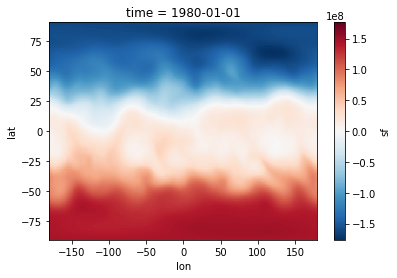

In [165]:
data.astype('float32').isel(time = 0).sf.plot()

In [8]:
test2 = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files4/SLP_lead0')
test2

<xarray.Dataset>
Dimensions:    (time: 13153, lat_index: 90, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2019-12-31
  * lon        (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    lat        (lat_index) float64 dask.array<chunksize=(90,), meta=np.ndarray>
  * lat_index  (lat_index) int64 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
Data variables:
    SLP        (time, lat_index, lon) float32 dask.array<chunksize=(13153, 90, 144), meta=np.ndarray>

In [7]:
y = pd.read_csv('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AR_binary_daily.csv')
y

,0,1,2,3,4,5,6,7,8,9,...,14600,14601,14602,14603,14604,14605,14606,14607,14608,14609
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test2.isel(time = 1).SLP.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

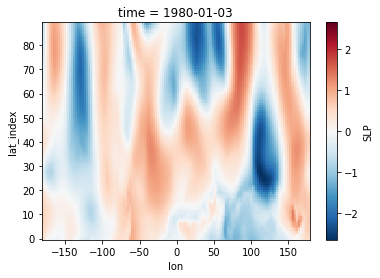

In [16]:
test2.isel(time = 2).SLP.plot()

### np.shape(np.array([year_data.sf[32].values]*32))

In [131]:
year_data['sf'][0:32].values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [83]:
test = test.reindex(lat=list(reversed(test.lat)))


/home/reba1583/.local/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [3]:
## UNET data - finer resolution, spatial Y
ds_1 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Training_data_UNET/full_data.nc', chunks ='auto')


In [3]:
## CNN data - coarse resolution, binary regional Y
ds_2 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_data_files/train.nc', chunks ='auto')


In [2]:
ds_3 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_files_new/train.nc')

In [77]:
ds_4 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_data_CNN/train_trim.nc')

In [78]:
newcolors = np.vstack((plt.get_cmap('Blues').reversed()(np.linspace(0, 1, 30)),np.ones((10,4)),
                       plt.get_cmap('Reds').reversed()(np.linspace(1, 0, 30))))
double = ListedColormap(newcolors, name='double')

In [79]:
# Y data 
slice_start = np.array([0, 36, 72, 108, 144, -180 ,-144, -108, -72,-36])

slice_end = slice_start + 36
colors = ['red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink', 
      'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink',
     'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink',
     'red', 'orange','yellow', 'green','blue', 'indigo', 'hotpink']


basins = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AIS_basins_Zwally_MERRA2grid.nc').sel(lat = slice(-90,-60)).load()
basins = basins.Zwallybasins > 0

y_data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y_labels_AR_PRECSN_T/*').load()



In [105]:
#define function 
def show_sample(ds_sample):
    num_channels = len(ds_sample.n_channel)
    y_plot_data = y_data.sel(time = ds_sample.time)
    y_plot_data = xr.where(y_plot_data.Y.isin([100, 101, 110, 111, 1100, 1101, 1110, 1111]),1, 0) 
    
    #define figure with 1 row and 5 columns. 
    fig,axes = plt.subplots(5,2,figsize=(25, 12))
    ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...
    fig.suptitle(str(ds_sample.time.values)[0:10]+' '+str(ds_sample.time.values)[11:13], fontsize = 20)
    #set the background to white, for some reason its transparent
    fig.set_facecolor('w')
    #loop over features (inputs)
    for i in range(num_channels):
        #plot images
        cf = ax[i].contourf(ds_sample.lon, ds_sample.lat, np.swapaxes(ds_sample.isel(n_channel = i).values, 0, 1),cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
        ax[i].axis('off')
        ax[i].set_title(ds_sample.n_channel[i].values, fontsize = 18)
    cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,
                      ticks=[-4,-3,-2,-1, 0,1, 2,3,4],pad = .1,extendrect=True, aspect = 25, extend = 'both')

    ax[num_channels].set_title('AR Detection', fontsize = 18)
    for s in range(len(slice_start)):
        slice_data = basins.sel(lon  = slice(slice_start[s], slice_end[s]))
        ax[num_channels].contourf(slice_data.lon, slice_data.lat, slice_data.values ,cmap = ListedColormap(['none', colors[s+2]]))

        ax[num_channels].contourf(slice_data.lon, slice_data.lat, xr.where(slice_data == True, 0, 1) ,cmap = ListedColormap(['none', colors[s]]))

    ax[num_channels].contourf(y_plot_data.lon, y_plot_data.lat, y_plot_data,cmap = ListedColormap(['none', 'black']))



    plt.savefig('/projects/reba1583/Research3/AntarcticAR_ML/Make_X_data/X_data_example.png', dpi = 300,facecolor = 'white', transparent=True, bbox_inches = 'tight') 


### One Timestep Example: Original Data

/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


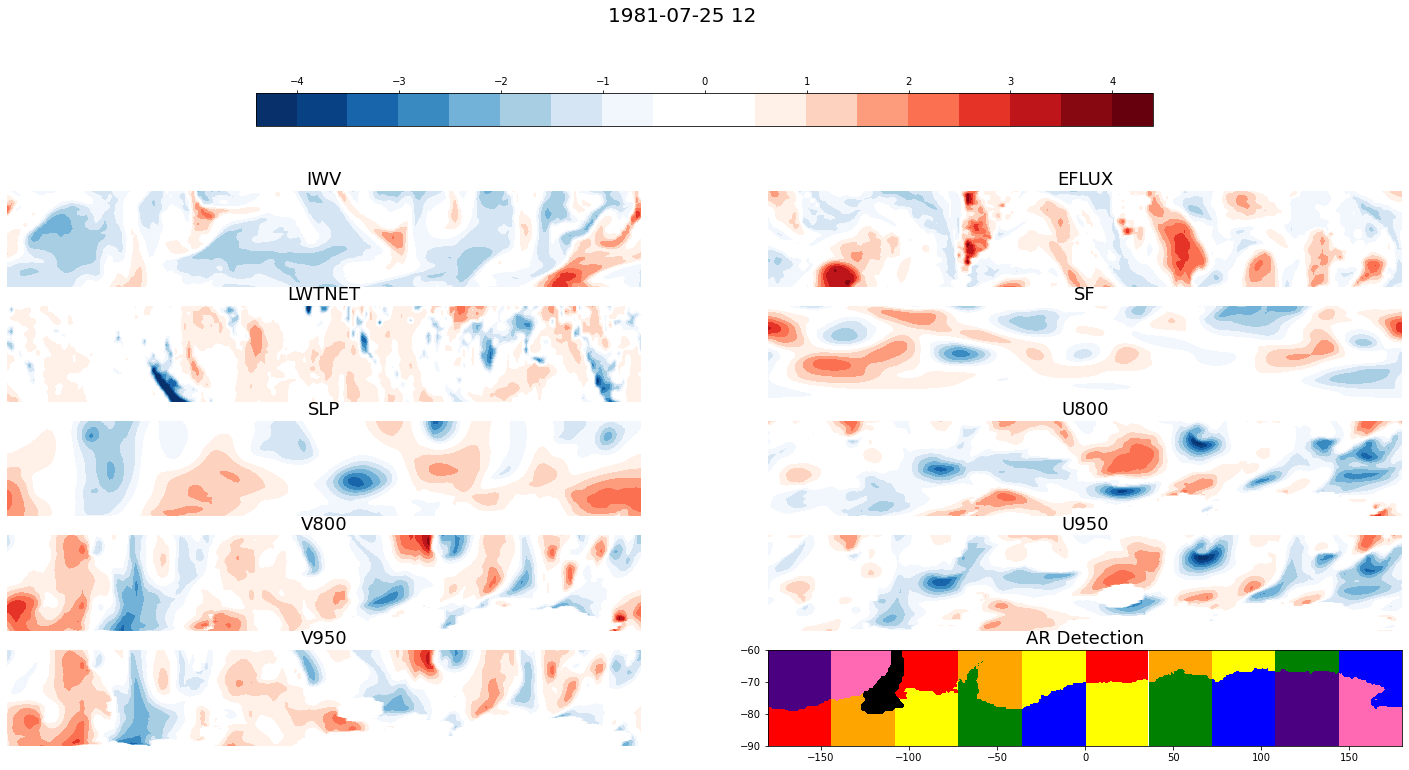

In [106]:
show_sample(ds_4.isel(time = 165).load().features)

In [3]:
variable_names = [
    'H500_lead0', 'H500_lead1', 'H500_lead2',
    
    'U800_lead0',
    
    'V800_lead0',
    
    'SLP_lead0', 'SLP_lead1', 'SLP_lead2',
    
    'EFLUX_lead0', 'EFLUX_lead1', 'EFLUX_lead2',
    
    'LWTNET_lead3', 'LWTNET_lead4', 'LWTNET_lead5',
    
    'sf_lead0','sf_4',
    
    'IWV_lead0', 'IWV_lead1', 'IWV_lead2',

    'AODANA_lead0', 'AODANA_lead1', 'AODANA_lead2'
]


In [10]:
i = 0
year = 1980
fp_out_1 = '/rc_scratch/reba1583/variable_yr_files1/'
file_name = variable_names[i]+'_'+str(year)

os.path.exists(fp_out_1+file_name)==False

False

In [16]:
os.path.exists(fp_out_1+file_name[0:2]+'*'+str(year)+'*')

False

In [ ]:
fp_out_1+

In [12]:
variables = [
    'H','H','H',
    
    'U',
    
    'V',
    
    'SLP','SLP','SLP',
    
    'EFLUX','EFLUX','EFLUX',
    
    'LWTNET','LWTNET','LWTNET',
    
    'sf', 'sf',
    
    'IWV','IWV','IWV',
    
    'AODANA', 'AODANA', 'AODANA'  
]


In [38]:

if ('3' in variable_names[i][-1]) | ('0' in variable_names[i][-1]):
    print('true')

In [51]:
import glob
str(1981) in glob.glob(fp_out_1+variables[i]+'*')

False

In [55]:
year = 2000
if len(glob.glob(fp_out_1+variables[i]+'*'+str(year)+'*'))>0: #if that variable has already been loaded for that year

False

In [50]:
year

1980